#### Time Series Forecasting on Gold Dataset!
Import all the necessary libraries needed for this project & Ensuring all the records/columns in the dataframe visible

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

##### Step 1: Load the dataset from a CSV file
Step 2: Print the number of rows and columns in the dataset

Step 3: Display the first 5 rows of the dataset for a quick overview

In [32]:
df = pd.read_csv('Downloads/gold_monthly_csv.csv')
print(f'Data Records:- {df.shape[0]}')
print(f'Data Columns:- {df.shape[1]}')
df.head()

Data Records:- 847
Data Columns:- 2


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [33]:
print(f"The available date range for gold prices spans from - {df.loc[:,'Date'][0]} - to - {df.loc[:, 'Date'][len(df)-1]} ")

The available date range for gold prices spans from - 1950-01 - to - 2020-07 


In [34]:
df.describe().round(2)

,Price
count,847.00
mean,416.56
std,453.67
min,34.49
25%,35.19
50%,319.62
75%,447.03
max,1840.81


 ###### Transforming the dataset into a monthly time-series format:
 - Step 1: Generate a monthly date range spanning January 1950 to August 2020.
 - Step 2: Add the date range to the dataframe as a new column named 'Month'.
 - Step 3: Remove the redundant 'Date' column from the dataframe.
 - Step 4: Set 'Month' as the index to structure the dataframe for time-based analysis.


In [35]:
date = pd.date_range(start='1/1/1950', end='8/1/2020', freq='m')
df['Month'] = date
df.drop('Date', axis=1, inplace=True)
df = df.set_index('Month')
df.head()

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


 Resample the dataset to analyze gold price trends over different time scales (monthly, yearly, and decade averages), 
- calculate yearly percentage changes in prices, and visualize these trends for deeper insights.

<Axes: title={'center': 'Visualize the Yearly trends in gold prices since 1950'}, xlabel='Month'>

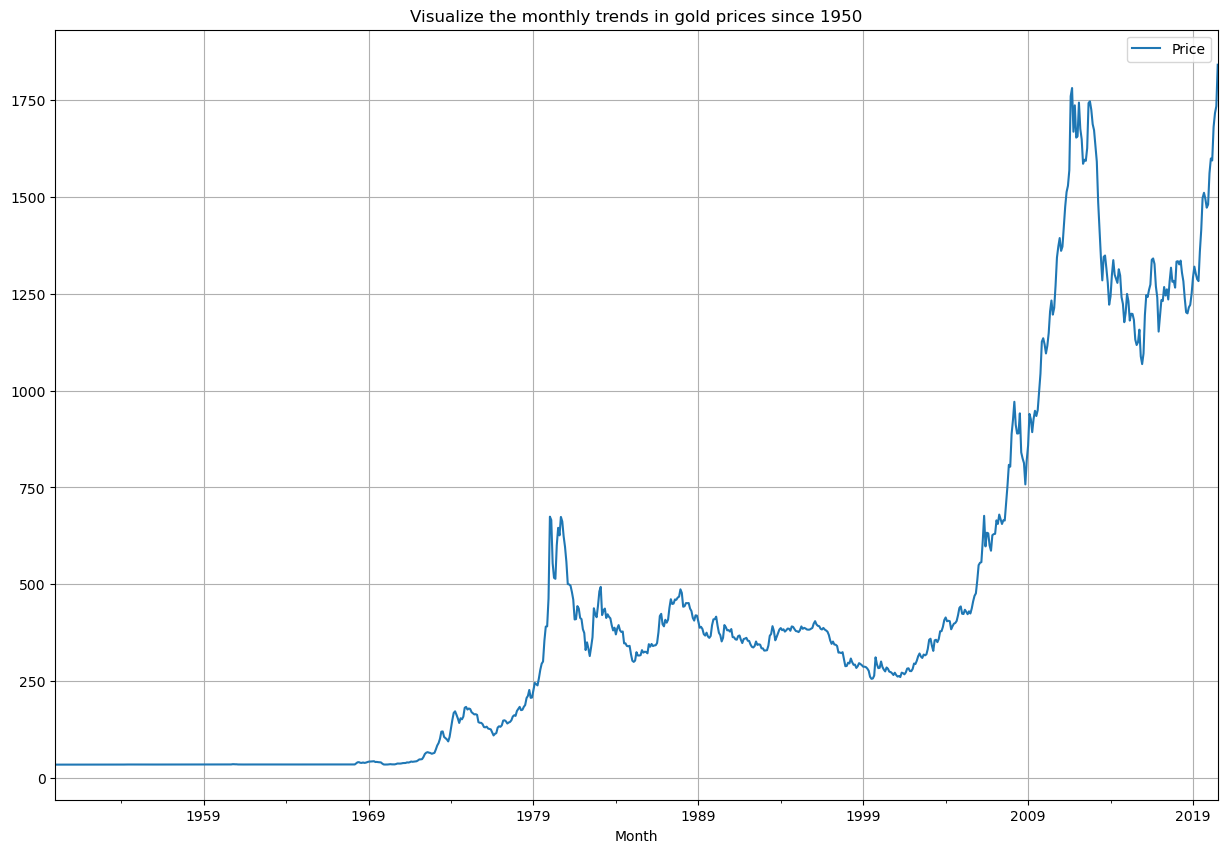

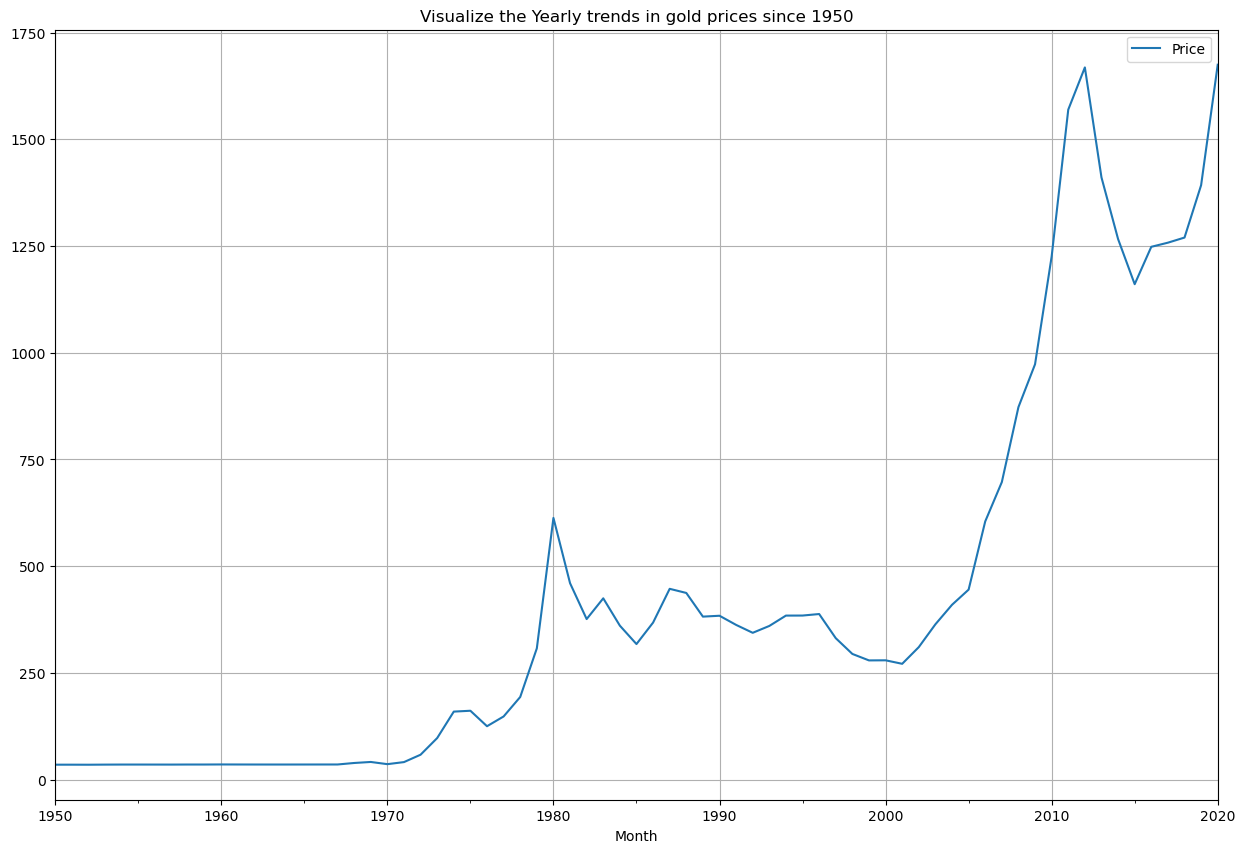

In [36]:
monthly_re = df.resample("m").mean()
yearly_re = df.resample("y").mean()
decade_re = df.resample("10y").mean()
df_pct = df['Price'].pct_change(365)
monthly_re.plot(title='Visualize the monthly trends in gold prices since 1950', figsize=(15,10), grid=True)
yearly_re.plot(title='Visualize the Yearly trends in gold prices since 1950', figsize=(15,10), grid=True)

<Axes: title={'center': 'Visualize the a decade trends in gold prices since 1950'}, xlabel='Month'>

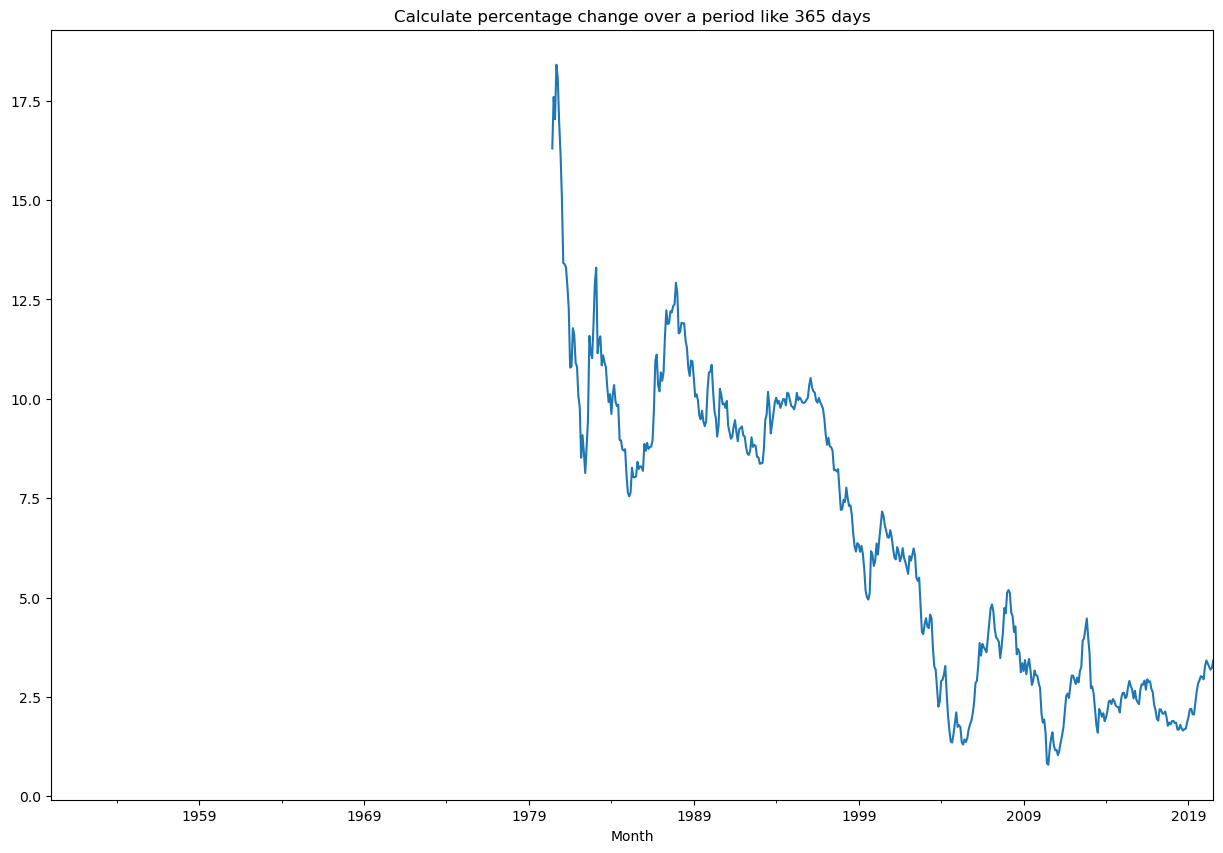

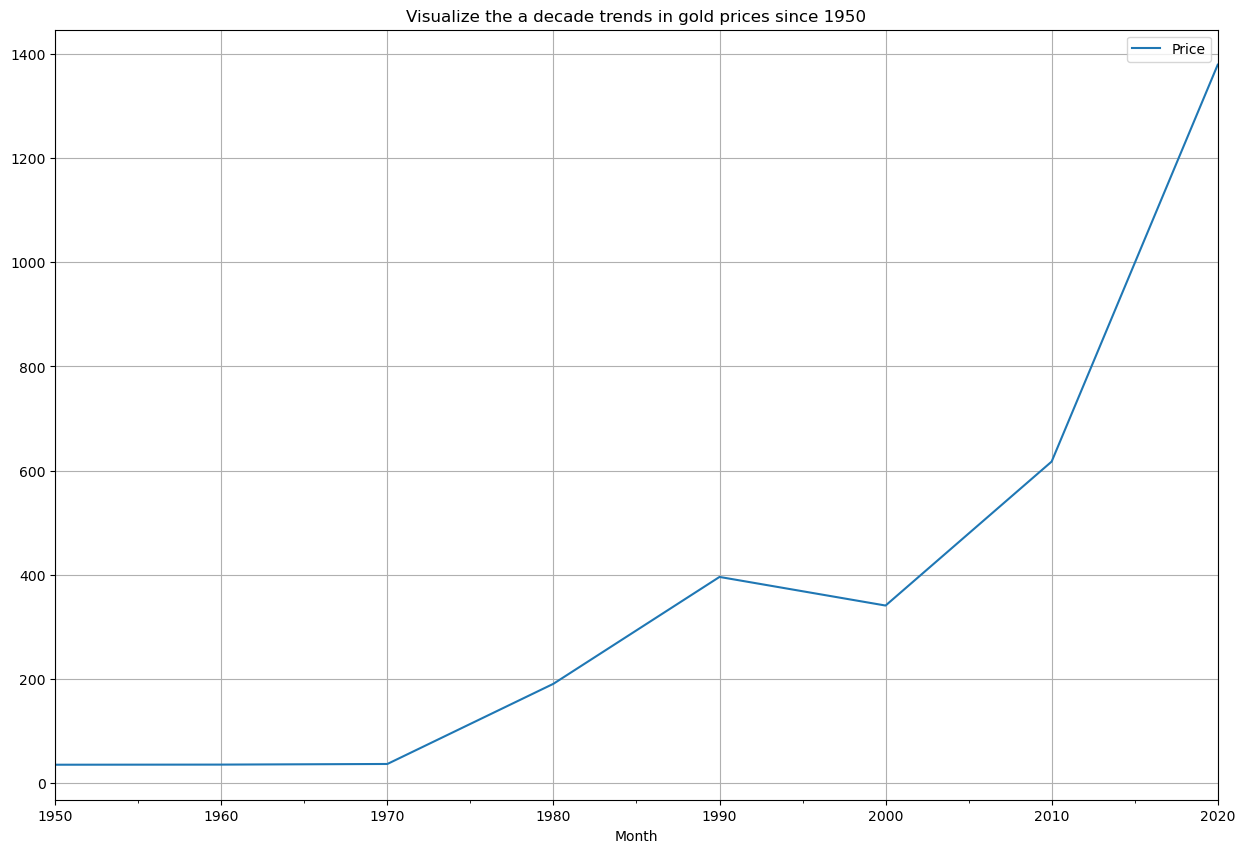

In [37]:
df_pct.plot(figsize=(15,10), title='Calculate percentage change over a period like 365 days')
decade_re.plot(title='Visualize the a decade trends in gold prices since 1950', figsize=(15,10), grid=True)

#### Create a box plot to visualize the distribution of gold prices across different months:

 - Step 1: Initialize a figure and axis object with a specified size for better readability.
 - Step 2: Use seaborn's boxplot to display the data:
 - 'x': Extract month names from the dataframe index as the x-axis categories.
 - 'y': Use the values from the first column of the dataframe ('Price') as the y-axis data.
 - 'ax': Draw the box plot on the pre-defined axis object.

<Axes: xlabel='Month'>

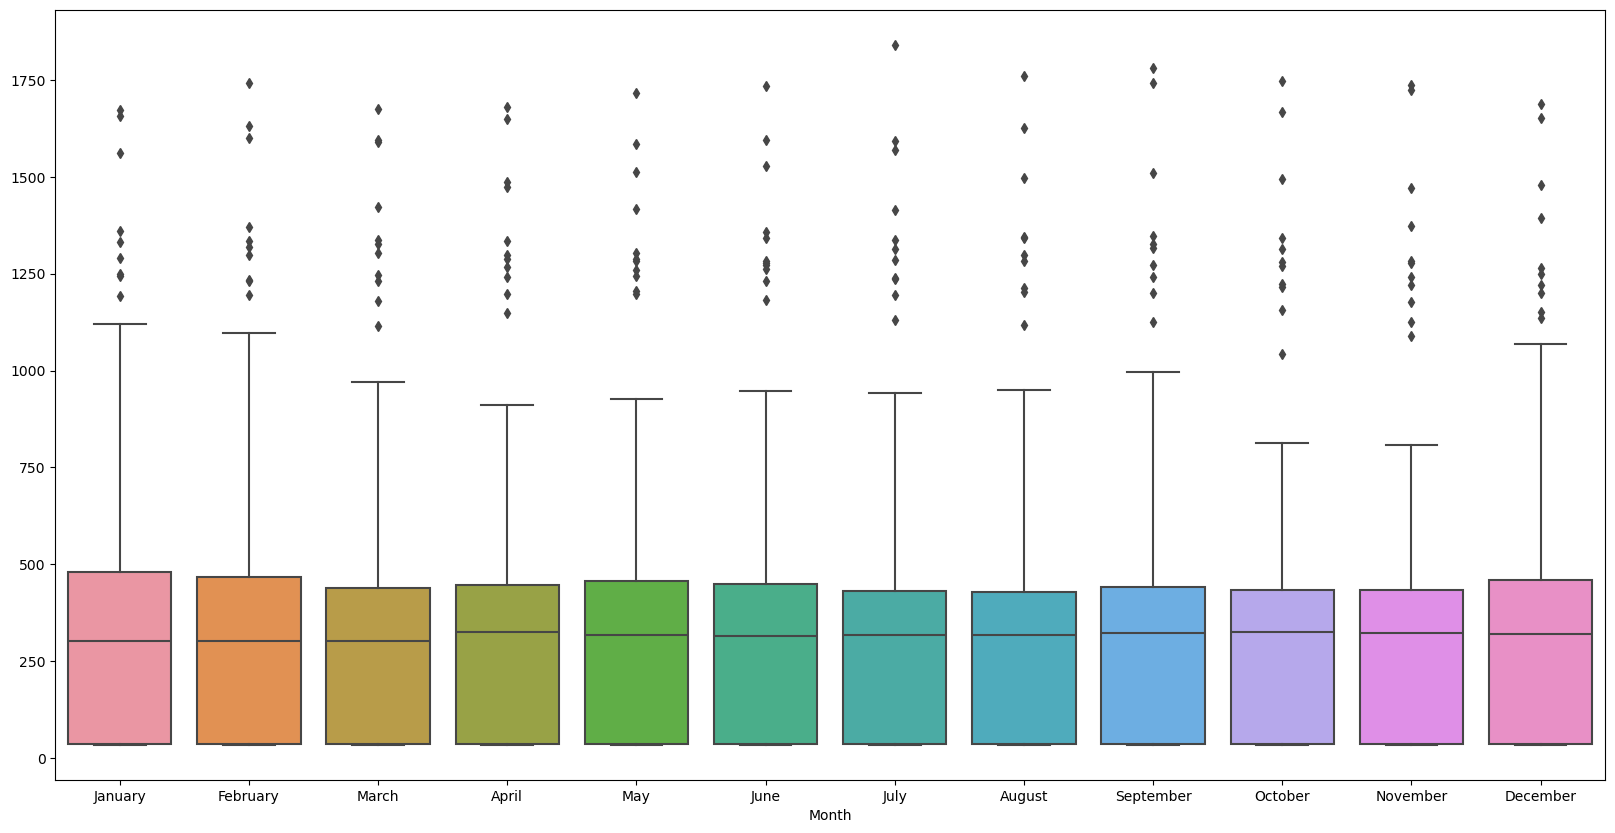

In [7]:
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(x= df.index.month_name(), y = df.values[:,0], ax=ax)

#### Group the dataset by year to calculate yearly mean and standard deviation for gold prices. 
- Step 1: Calculate the yearly mean for 'Price' and rename the column to 'Mean'. 
- Step 2: Calculate the yearly standard deviation for 'Price' and rename the column to 'Std'. 
- Merge this with the existing dataframe containing the yearly mean. 
- Step 3: Compute the Coefficient of Variation (CV) percentage using the formula (Std / Mean * 100).

In [8]:
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True).reset_index()
df_1['Coeffe_Va_pct'] = ((df_1['Std'] / df_1['Mean'])*100).round(2)
df_1.head()

,Month,Mean,Std,Coeffe_Va_pct
0,1950,34.729167,0.002887,0.01
1,1951,34.717500,0.020057,0.06
2,1952,34.628333,0.117538,0.34
3,1953,34.879167,0.056481,0.16
4,1954,35.020000,0.082792,0.24


#### Plotting the Coefficient of Variation (CV) over the years to visualize the yearly variability in gold prices:
  - Initialize a figure and axis with a specified size for better readability.
  - Use a line plot with markers to represent the 'Coefficient of Variation (%)' column:
  - Customize the plot's appearance with a blue line, pink marker face, and marker edges for visual clarity.


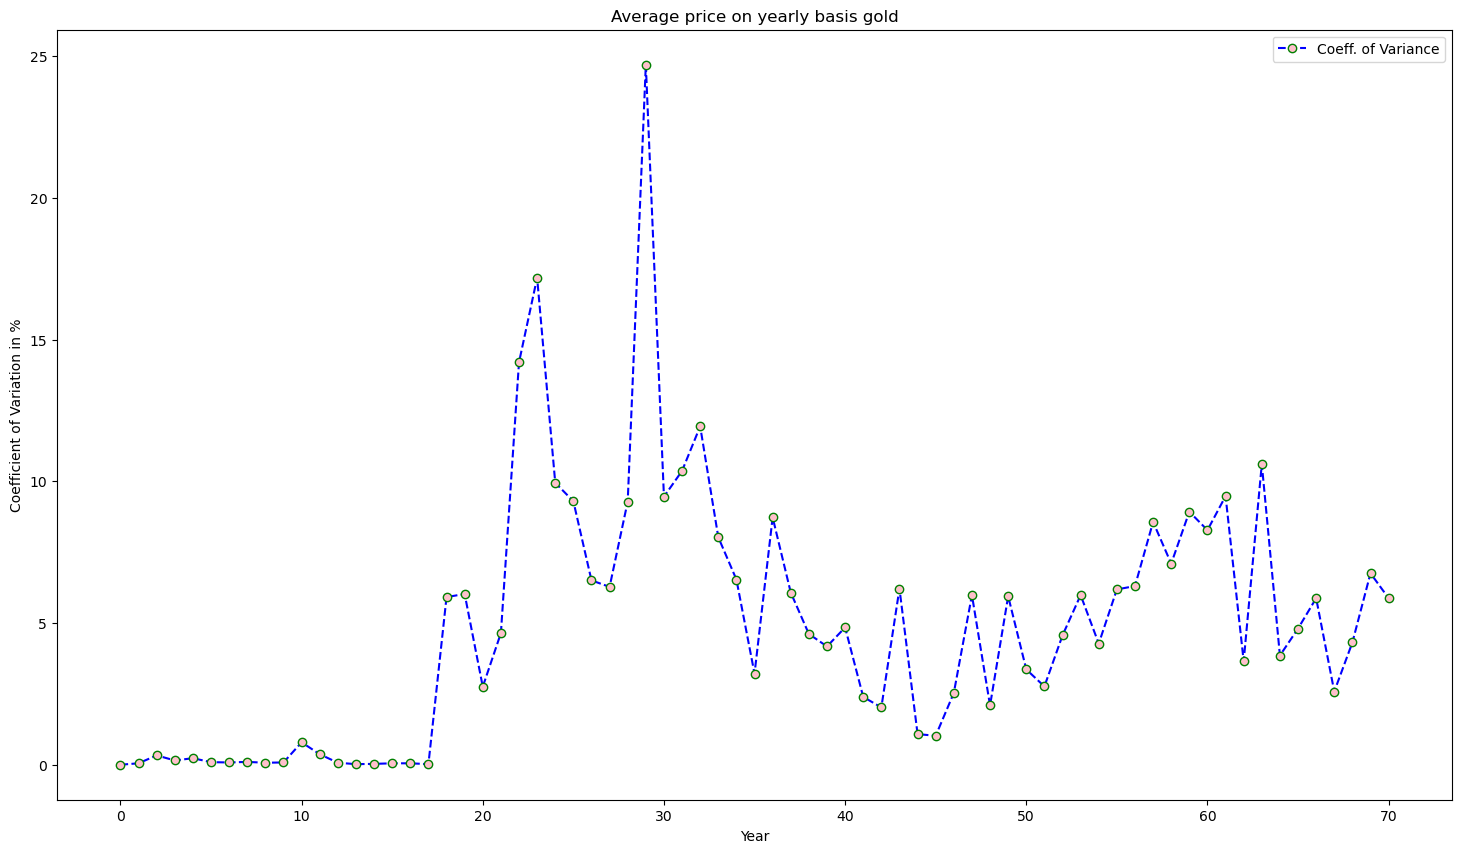

In [9]:
fig, ax = plt.subplots(figsize=(18,10))

ax.plot(
    df_1.index, df_1['Coeffe_Va_pct'],
    linestyle='--',
    marker='o',
    color='blue',              # Line color
    markerfacecolor='pink',     # Fill color of marker
    markeredgecolor='green',   # Border color of marker
    label='Coeff. of Variance'
)

ax.set_title('Average price on yearly basis gold')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient of Variation in %')
ax.legend()

#### Define custom legend elements for better visual understanding:
- 'Training': Represented by a line with default color and label.
- 'Test': Represented by an orange-colored line for differentiation.
- 'Train-Test Split': Represented by a dashed red line to mark the boundary between training and test sets.
- Plot the training and test data along with the split marker:

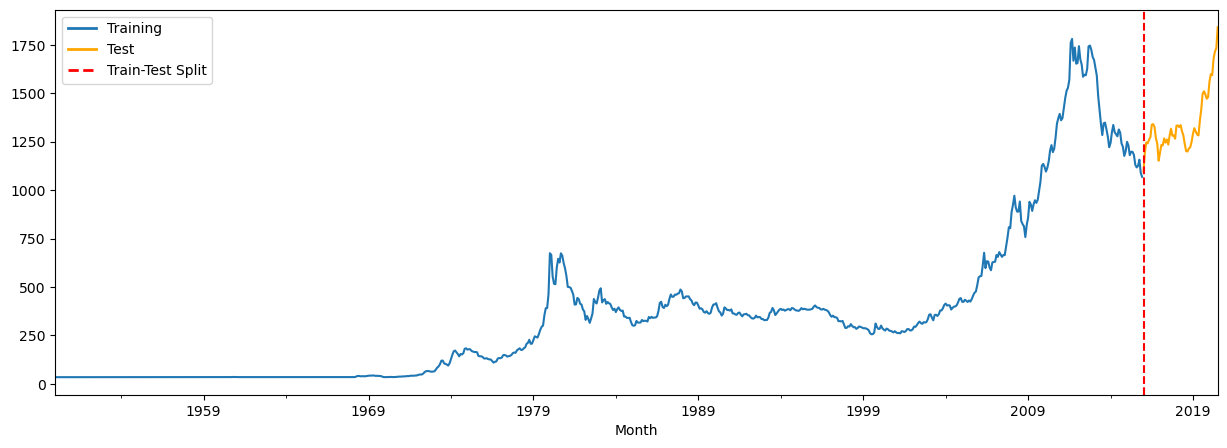

In [10]:
# Splitting the dataset into training and test sets:
# - Separate data into 'Training' set (data up to 2015) and 'Test' set (data beyond 2015).
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

training_line = Line2D([0], [0], lw=2, label='Training')
test_line = Line2D([0], [0], color='orange', lw=2, label='Test')
split_line = Line2D([0], [0], color='red', lw=2, linestyle='--', label='Train-Test Split')

legend_elements = [training_line, test_line, split_line]

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, )  
test.plot(ax=ax, color='orange')
ax.axvline('2016', color='red', ls='--') 

ax.legend(handles=legend_elements)

#### Generate sequential time indices for training and test datasets.
- 'train_time' starts at 1 and increments by 1 for each element in 'train'.

- 'test_time' continues from the last training time index, ensuring continuity.

In [11]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [12]:
LR_train = train.copy()
LR_test = test.copy()

LR_train['time'] = train_time
LR_test['time'] = test_time

#### Initialize a Linear Regression model and train it using the 'time' feature from the training dataset (LR_train) to predict the 'Price' values.

In [13]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

#### Make predictions on the test dataset using the trained Linear Regression model:
- Step 1: Use the model to predict 'Price' values for the test data based on the 'time' feature.
- Step 2: Add the predictions as a new column 'Forecast' to the test dataset (LR_test).
- Step 3: Visualize the model's results by plotting actual 'Price' values for training and test datasets, 
- Step 4: overlaying predicted 'Forecast' values for the test data, and enhancing interpretability with a legend and gridlines.

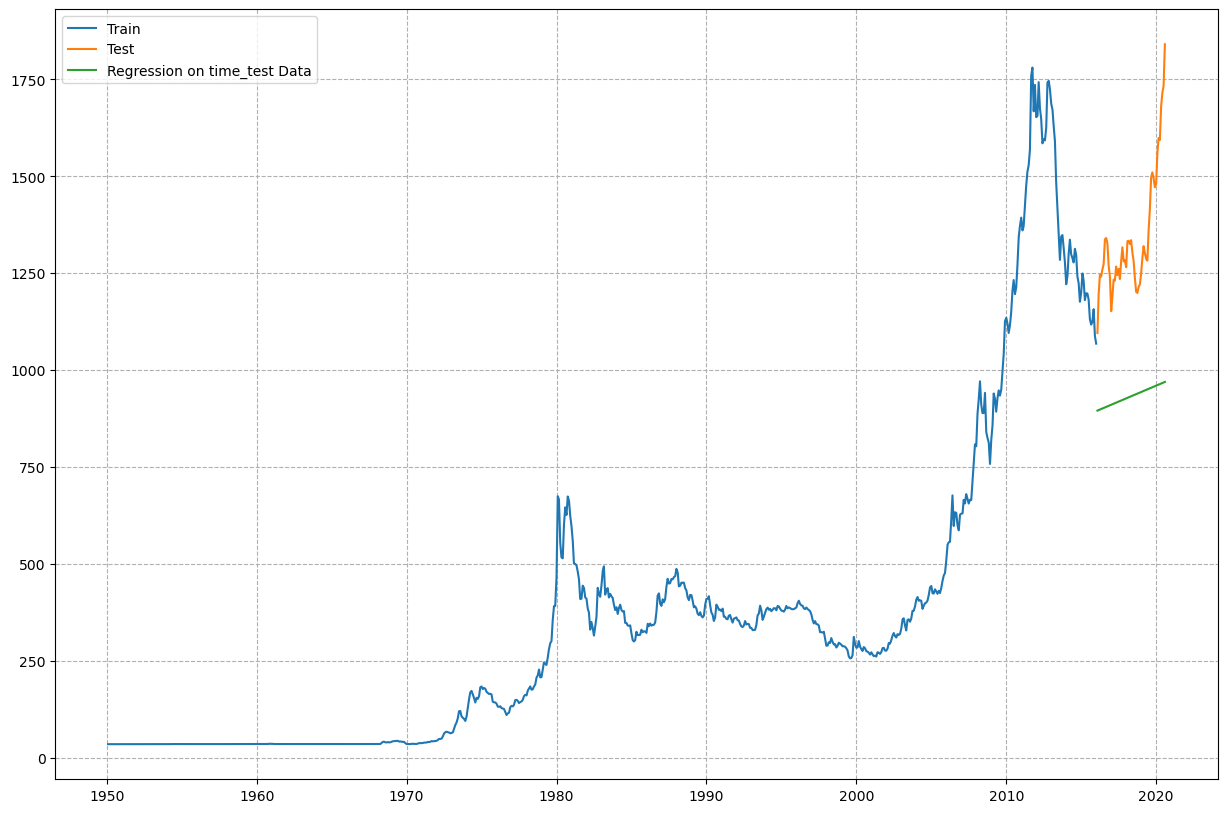

In [24]:
test_prediction_model1 = lr.predict(LR_test[['time']])
LR_test['Forecast'] = test_prediction_model1


plt.figure(figsize=(15,10))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(LR_test['Forecast'], label='Regression on time_test Data')
plt.legend(loc = 'best')
plt.grid(ls='--')

#### Calculate the Mean Absolute Percentage Error (MAPE) to assess the accuracy of the model's predictions:
- Define a function 'mape' to compute the percentage error between actual and predicted values.
- Use the 'mape' function to calculate the test set's MAPE (mope_model_test) for 'Price'.
- Print the calculated MAPE as a percentage for easy interpretation.
- Store the MAPE value in a DataFrame ('Results') with a descriptive index for organized reporting.

In [15]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred) / actual ))*100, 2)

mope_model_test = mape(test['Price'].values, test_prediction_model1)
print(f'MAPE is {mope_model_test} %')

MAPE is 29.76 %


In [16]:
Results = pd.DataFrame({
    "Test MAPE (%)": [mope_model_test] 
}, index=["RegressionOnTime"])
Results

,Test MAPE (%)
RegressionOnTime,29.76


#### Implement a naive forecasting method to predict gold prices:
- Create copies of the training and test datasets for naive forecast analysis.
- Generate naive forecasts by setting all test data predictions equal to the last observed 'Price' in the training data.
- Display the first few naive predictions to verify the forecast values.
- Plot the training data, test data, and naive forecast data for visual comparison of actual and predicted prices.
- Add gridlines for better readability of the graph and enable the legend to differentiate between the data sets.


In [17]:
naive_train = train.copy()
naive_test = test.copy()
naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price'])) -1]
naive_test['naive'].head()

Month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

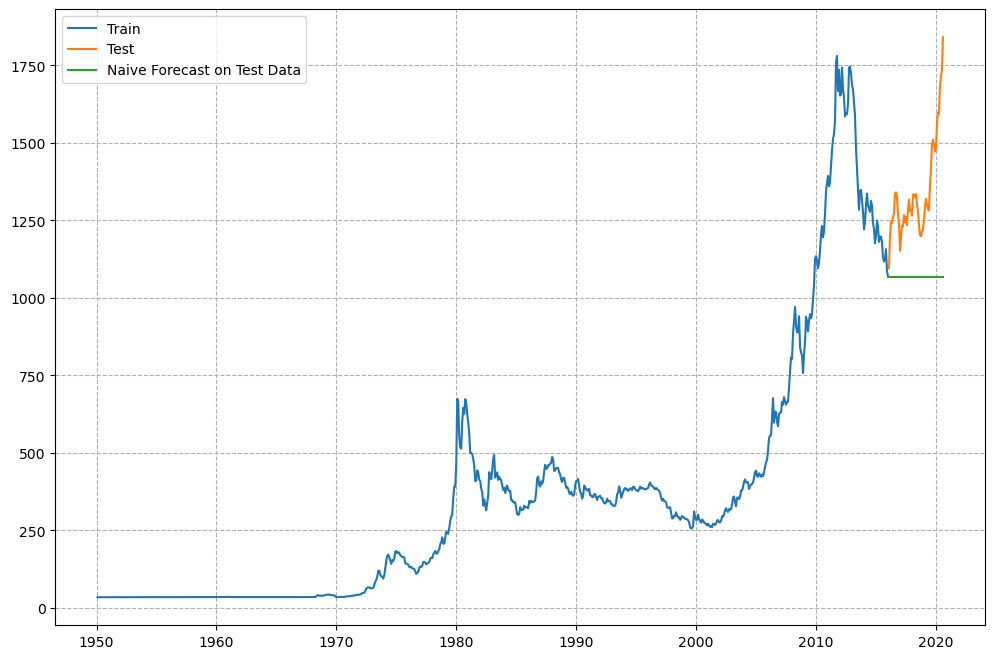

In [18]:
plt.figure(figsize=(12,8))
plt.plot(naive_train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(naive_test['naive'], label='Naive Forecast on Test Data')
plt.grid(ls='--')
plt.legend(loc = 'best')

 Evaluate and compare forecasting model performance by calculating the Mean Absolute Percentage Error (MAPE) for the naive forecast and an advanced Exponential Smoothing model, while printing the results for clear interpretation.

In [19]:
mape_model2_test = mape(test['Price'].values, naive_test['naive'].values)
print('For Naive Forecast on the test Data, MAPE is %3.2f' %(mape_model2_test), '%')
final_model = ExponentialSmoothing(df, trend='additive', seasonal = 'additive').fit(
    smoothing_level=0.4, smoothing_trend=0.3, smoothing_seasonal=0.6)

MAPE_final_model = mape(df['Price'].values, final_model.fittedvalues)
print(f'MAPE: ', MAPE_final_model )

For Naive Forecast on the test Data, MAPE is 19.38 %
MAPE:  17.24


#### Generate predictions for the test dataset using the fitted Exponential Smoothing model:
- Step 1: Forecast values for the specified number of steps (equal to the length of the test dataset).
- Step 2: Create a DataFrame ('pred_df') to organize the forecasted data along with confidence intervals:
- 'Lower CI': Calculate the lower bound of the 95% confidence interval.
- 'Prediction': Store the forecasted values.
- 'Upper CI': Calculate the upper bound of the 95% confidence interval.


In [20]:
predictions = final_model.forecast(steps=len(test))

In [21]:
pred_df = pd.DataFrame({'Lower CI': predictions - 1.96 * np.std(final_model.resid, ddof=1),
                       'Prediction': predictions,
                       'Upper CI': predictions + 1.96 * np.std(final_model.resid, ddof=1)})
pred_df.head()

,Lower CI,Prediction,Upper CI
2020-08-31,1684.717436,1792.868408,1901.019381
2020-09-30,1615.300407,1723.451380,1831.602352
2020-10-31,1538.558939,1646.709911,1754.860884
2020-11-30,1476.746475,1584.897447,1693.048420
2020-12-31,1459.312605,1567.463577,1675.614550


### Visualize the actual and forecasted gold prices:
- Plot the actual data ('Price') from the original dataframe (df) for comparison.
- Overlay the forecasted values ('Prediction') from the prediction DataFrame (pred_df) with reduced opacity (alpha=0.5).
- Add a shaded region to represent the 95% confidence intervals (Lower CI and Upper CI) for the predictions.
- Display the completed plot to summarize and present the results visually.

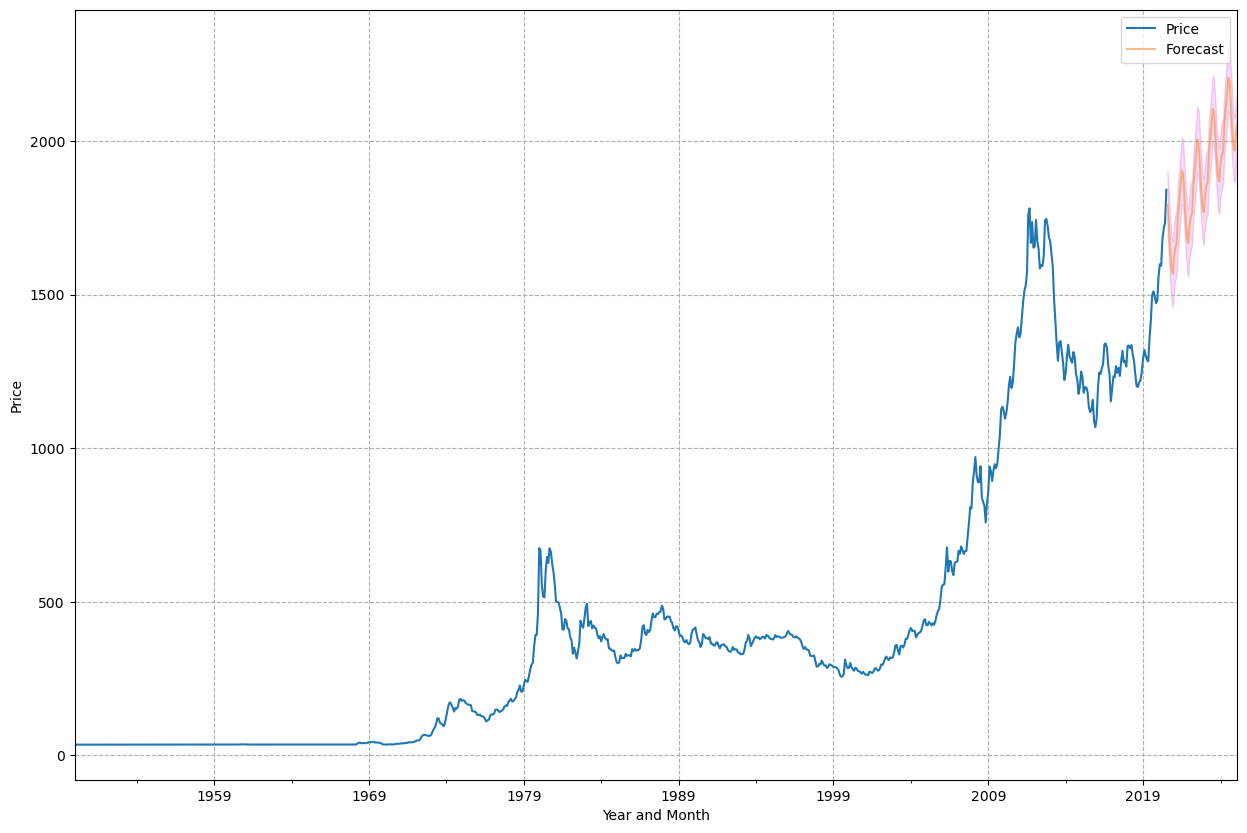

In [22]:
# Plot actual data and forecast
ax = df.plot(label='Actual Data', figsize=(15, 10))  
pred_df['Prediction'].plot(ax=ax, label='Forecast', alpha=0.5)
ax.fill_between(pred_df.index, pred_df['Lower CI'], pred_df['Upper CI'], color='m', alpha=0.15)
ax.set_xlabel("Year and Month")
ax.set_ylabel("Price")
ax.legend()
plt.grid(ls='--')
plt.show()